In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
##from google.colab import drive
##drive.mount('/content/drive')

In [41]:
##sp500 = pd.read_excel('/content/S&P500Index.xlsx')
sp500 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/S&P500Index.xlsx')

In [42]:
sp500['Dates'] = pd.to_datetime(sp500['Dates'], dayfirst=True)

In [43]:
start_date = pd.to_datetime('1980-01-01', dayfirst=True)
end_date = pd.to_datetime('2023-12-31', dayfirst=True)
sp500_filtered = sp500[(sp500['Dates'] >= start_date) & (sp500['Dates'] <= end_date)]

In [44]:
sp500_filtered['Pct Change'] = sp500_filtered['PX_LAST'].pct_change() * 100

In [45]:
sp500_filtered

,Dates,PX_LAST,Pct Change
0,1980-05-19,107.67,NaN
1,1980-05-20,107.62,-0.046438
2,1980-05-21,107.72,0.092920
3,1980-05-22,109.01,1.197549
4,1980-05-23,110.62,1.476929
...,...,...,...
10858,2023-06-12,4338.93,0.932108
10859,2023-06-13,4369.01,0.693258
10860,2023-06-14,4372.59,0.081941
10861,2023-06-15,4425.84,1.217814


# Parametric Normal VaR

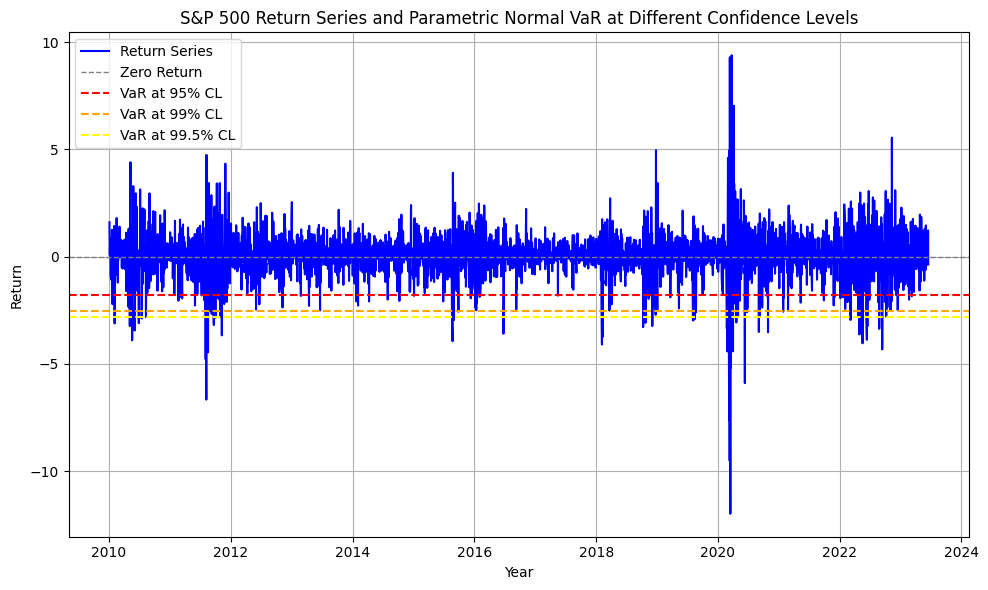

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming you have already read the data into the DataFrame 'sp500'
# The 'sp500' DataFrame contains the columns 'Dates' and 'PX_LAST'

# Convert the 'Dates' column to pandas DatetimeIndex (if not already in datetime format)
sp500['Dates'] = pd.to_datetime(sp500['Dates'], dayfirst=True)

# Calculate the 'Pct Change' column based on 'PX_LAST'
sp500['Pct Change'] = sp500['PX_LAST'].pct_change() * 100

# Filter data for the desired date range (from 2010 to 2023)
start_date = pd.to_datetime('2010-01-01', dayfirst=True)
end_date = pd.to_datetime('2023-12-31', dayfirst=True)
filtered_data = sp500[(sp500['Dates'] >= start_date) & (sp500['Dates'] <= end_date)]

# Get the returns series from the filtered DataFrame
returns = filtered_data['Pct Change']

# Calculate the mean and standard deviation of returns
mean_return = returns.mean()
std_return = returns.std()

# Calculate the VaR at 95%, 99%, and 99.5% confidence levels using the standard normal percent-point function (PPF)
VaR_95 = norm.ppf(0.05, mean_return, std_return)
VaR_99 = norm.ppf(0.01, mean_return, std_return)
VaR_995 = norm.ppf(0.005, mean_return, std_return)

# Plot the return series and the VaR curves
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Dates'], returns, label='Return Series', color='blue')
plt.axhline(0, color='gray', linestyle='--', linewidth=1, label='Zero Return')
plt.axhline(VaR_95, linestyle="--", color="red", label='VaR at 95% CL')
plt.axhline(VaR_99, linestyle="--", color="orange", label='VaR at 99% CL')
plt.axhline(VaR_995, linestyle="--", color="yellow", label='VaR at 99.5% CL')

# Format the x-axis as years
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

plt.xlabel('Year')
plt.ylabel('Return')
plt.title('S&P 500 Return Series and Parametric Normal VaR at Different Confidence Levels')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [47]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Assuming you have already read and filtered the data as shown in your previous code
# The 'returns' array contains the raw return series

# Sample size
sample_size = 3292

# Confidence levels
confidence_levels = [0.995, 0.99, 0.95]

# Calculate the mean and standard deviation of returns
mean_return = returns.mean()
std_return = returns.std()

# Calculate VaR at different confidence levels using the standard normal percent-point function (PPF)
VaR = {cl: norm.ppf(1 - cl, mean_return, std_return) for cl in confidence_levels}

# Calculate the probability of violation at different confidence levels
probability_of_violation = {cl: 1 - cl for cl in confidence_levels}

# Calculate the expected number of violations for Lopez I at different confidence levels
expected_violations = {cl: probability_of_violation[cl] * sample_size for cl in confidence_levels}

# Print the results
for cl in confidence_levels:
    print(f"Confidence Level: {cl}")
    print(f"Expected Violations for Lopez I: {expected_violations[cl]:.2f}")
    print("-" * 40)


Confidence Level: 0.995
Expected Violations for Lopez I: 16.46
----------------------------------------
Confidence Level: 0.99
Expected Violations for Lopez I: 32.92
----------------------------------------
Confidence Level: 0.95
Expected Violations for Lopez I: 164.60
----------------------------------------


In [48]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Assuming you have already read and filtered the data as shown in your previous code
# The 'returns' array contains the raw return series

# Sample size
sample_size = 3292

# Confidence levels
confidence_levels = [0.995, 0.99, 0.95]

# Calculate the mean and standard deviation of returns
mean_return = returns.mean()
std_return = returns.std()

# Calculate VaR at different confidence levels using the standard normal percent-point function (PPF)
VaR_995 = norm.ppf(1 - 0.995, mean_return, std_return)
VaR_99 = norm.ppf(1 - 0.99, mean_return, std_return)
VaR_95 = norm.ppf(1 - 0.95, mean_return, std_return)

# Calculate the actual number of violations at different confidence levels
actual_violations = {
    0.995: len(returns[returns < VaR_995]),
    0.99: len(returns[returns < VaR_99]),
    0.95: len(returns[returns < VaR_95])
}

# Define a dictionary to store the expected violations
expected_violations = {
    0.995: 16.46,
    0.99: 32.92,
    0.95: 164.60
}

# Calculate Lopez I on all three levels
lopez_I = {}
for cl in confidence_levels:
    lopez_I[cl] = (actual_violations[cl] - expected_violations[cl]) / np.sqrt(expected_violations[cl])

# Print the results
print("Lopez I Backtest Results:")
for cl in confidence_levels:
    print(f"Confidence Level: {cl}")
    print(f"Expected Violations: {expected_violations[cl]}")
    print(f"Actual Violations: {actual_violations[cl]}")
    print(f"Lopez I: {lopez_I[cl]:.4f}")
    print("-" * 40)


Lopez I Backtest Results:
Confidence Level: 0.995
Expected Violations: 16.46
Actual Violations: 52
Lopez I: 8.7600
----------------------------------------
Confidence Level: 0.99
Expected Violations: 32.92
Actual Violations: 67
Lopez I: 5.9398
----------------------------------------
Confidence Level: 0.95
Expected Violations: 164.6
Actual Violations: 156
Lopez I: -0.6703
----------------------------------------


In [49]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.stats import chi2_contingency

# Assuming you have already read and filtered the data as shown in your previous code
# The 'returns' array contains the raw return series

# Sample size
sample_size = 3292

# Confidence levels
confidence_levels = [0.995, 0.99, 0.95]

# Common number of violations for each confidence level
common_violations = 50

# Calculate the mean and standard deviation of returns
mean_return = returns.mean()
std_return = returns.std()

# Calculate VaR at different confidence levels using the standard normal percent-point function (PPF)
VaR = {cl: norm.ppf(1 - cl, mean_return, std_return) for cl in confidence_levels}

# Calculate the actual number of violations at different confidence levels
actual_violations = {cl: len(returns[returns < VaR[cl]]) for cl in confidence_levels}

# Define a dictionary to store the expected violations (you can update this with actual values)
expected_violations = {
    0.995: 16.46,
    0.99: 32.92,
    0.95: 164.60
}

# Define a function to perform Kupiec Backtest
def kupiec_backtest(actual_violations, expected_violations, alpha=0.05):
    n_violations = sum(actual_violations.values())
    n_expected_violations = sum(expected_violations.values())
    chi2_statistic = 2 * (n_expected_violations * np.log(n_expected_violations / n_violations) + (sample_size - n_expected_violations) * np.log((sample_size - n_expected_violations) / (sample_size - n_violations)))
    p_value = 1 - chi2_contingency([[n_violations, n_expected_violations], [sample_size - n_violations, sample_size - n_expected_violations]])[1]
    return chi2_statistic, p_value

# Perform Kupiec Backtest
chi2_statistic, p_value = kupiec_backtest(actual_violations, expected_violations)

# Unconditional Coverage of Kupiec (1995)
unconditional_coverage = 1 - p_value

# Independence Test of Christofferson (1998)
independence_test = p_value < 0.05

# Print Backtest Results
print("Backtest Results:")
for cl in confidence_levels:
    print(f"Confidence Level: {cl}")
    print(f"Expected Violations: {expected_violations[cl]:.2f}")
    print(f"Actual Violations: {actual_violations[cl]}")
    print("-" * 40)

print("Kupiec Backtest:")
print(f"Chi2 Statistic: {chi2_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Unconditional Coverage: {unconditional_coverage:.4f}")
print(f"Independence Test: {'Reject Null' if independence_test else 'Fail to Reject Null'}")


Backtest Results:
Confidence Level: 0.995
Expected Violations: 16.46
Actual Violations: 52
----------------------------------------
Confidence Level: 0.99
Expected Violations: 32.92
Actual Violations: 67
----------------------------------------
Confidence Level: 0.95
Expected Violations: 164.60
Actual Violations: 156
----------------------------------------
Kupiec Backtest:
Chi2 Statistic: 15.8957
P-value: 0.9952
Unconditional Coverage: 0.0048
Independence Test: Fail to Reject Null


In [50]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.stats import chi2_contingency
import json

# Assuming you have already read and filtered the data as shown in your previous code
# The 'returns' array contains the raw return series

# Sample size
sample_size = 3292

# Confidence levels
confidence_levels = [0.995, 0.99, 0.95]

# Common number of violations for each confidence level
common_violations = 50

# Calculate the mean and standard deviation of returns
mean_return = returns.mean()
std_return = returns.std()

# Calculate VaR at different confidence levels using the standard normal percent-point function (PPF)
VaR = {cl: norm.ppf(1 - cl, mean_return, std_return) for cl in confidence_levels}

# Calculate the actual number of violations at different confidence levels
actual_violations = {cl: len(returns[returns < VaR[cl]]) for cl in confidence_levels}

# Define a dictionary to store the expected violations (you can update this with actual values)
expected_violations = {
    0.995: 16.46,
    0.99: 32.92,
    0.95: 164.60
}

# Define a function to perform Kupiec Backtest
def kupiec_backtest(actual_violations, expected_violations, alpha=0.05):
    n_violations = sum(actual_violations.values())
    n_expected_violations = sum(expected_violations.values())
    chi2_statistic = 2 * (n_expected_violations * np.log(n_expected_violations / n_violations) + (sample_size - n_expected_violations) * np.log((sample_size - n_expected_violations) / (sample_size - n_violations)))
    p_value = 1 - chi2_contingency([[n_violations, n_expected_violations], [sample_size - n_violations, sample_size - n_expected_violations]])[1]
    return chi2_statistic, p_value

# Perform Kupiec Backtest
chi2_statistic, p_value = kupiec_backtest(actual_violations, expected_violations)

# Store the values of expected and actual violations in a JSON file
violations_data = {
    'Expected Violations': expected_violations,
    'Actual Violations': actual_violations
}

# Save violations_data as a JSON file
with open('violations_data.json', 'w') as json_file:
    json.dump(violations_data, json_file)

# Unconditional Coverage of Kupiec (1995)
unconditional_coverage = 1 - p_value

# Independence Test of Christofferson (1998)
independence_test = p_value < 0.05

# Print Backtest Results
print("Backtest Results:")
for cl in confidence_levels:
    print(f"Confidence Level: {cl}")
    print(f"Expected Violations: {expected_violations[cl]:.2f}")
    print(f"Actual Violations: {actual_violations[cl]}")
    print("-" * 40)

print("Kupiec Backtest:")
print(f"Chi2 Statistic: {chi2_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Unconditional Coverage: {unconditional_coverage:.4f}")
print(f"Independence Test: {'Reject Null' if independence_test else 'Fail to Reject Null'}")


Backtest Results:
Confidence Level: 0.995
Expected Violations: 16.46
Actual Violations: 52
----------------------------------------
Confidence Level: 0.99
Expected Violations: 32.92
Actual Violations: 67
----------------------------------------
Confidence Level: 0.95
Expected Violations: 164.60
Actual Violations: 156
----------------------------------------
Kupiec Backtest:
Chi2 Statistic: 15.8957
P-value: 0.9952
Unconditional Coverage: 0.0048
Independence Test: Fail to Reject Null


In [51]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import json

# Sample size
sample_size = 3292

# Confidence levels
confidence_levels = [0.995, 0.99, 0.95]

# Load the violations data from a JSON file
with open('violations_data.json', 'r') as file:
    violations_data = json.load(file)

# Define a function to calculate Parametric Normal VaR
def calculate_parametric_var(confidence_level, mean, std_dev):
    z_score = norm.ppf(1 - (1 - confidence_level) / 2)
    parametric_var = mean + z_score * std_dev
    return parametric_var

# Define a function to perform Kupiec Backtest
def kupiec_backtest(actual_violations, parametric_var, alpha=0.05):
    n_violations = actual_violations

    # Check if n_violations is zero
    if n_violations == 0:
        chi2_statistic, p_value = 0.0, 1.0
    else:
        expected_violations = sample_size * (1 - alpha)
        chi2_statistic = 2 * (expected_violations * np.log(expected_violations / n_violations) + (sample_size - expected_violations) * np.log((sample_size - expected_violations) / (sample_size - n_violations)))
        p_value = 1 - chi2_contingency([[n_violations, expected_violations], [sample_size - n_violations, sample_size - expected_violations]])[1]

    return chi2_statistic, p_value

# Perform Kupiec Backtest for Parametric Normal VaR at each confidence level
backtest_results = {}
for cl in confidence_levels:
    cl_str = str(cl)  # Convert confidence level to a string
    mean = violations_data.get('Mean', {}).get(cl_str, 0)
    std_dev = violations_data.get('Standard Deviation', {}).get(cl_str, 0)
    actual_violations = violations_data.get('Actual Violations', {}).get(cl_str, 0)

    parametric_var = calculate_parametric_var(cl, mean, std_dev)
    chi2_statistic, p_value = kupiec_backtest(actual_violations, parametric_var)

    decision = 'Reject Null' if p_value < 0.05 else 'Fail to Reject Null'
    backtest_results[cl_str] = {
        'Parametric Normal VaR': parametric_var,
        'Actual Violations': actual_violations,
        'Likelihood Ratio Statistic': chi2_statistic,
        'P-value': p_value,
        'Decision': decision
    }

# Print Backtest Results
print("Backtest Results for Parametric Normal VaR:")
for cl in confidence_levels:
    cl_str = str(cl)  # Convert confidence level to a string
    print(f"Confidence Level: {cl_str}")
    print(f"Parametric Normal VaR: {backtest_results[cl_str]['Parametric Normal VaR']:.4f}")
    print(f"Actual Violations: {backtest_results[cl_str]['Actual Violations']}")
    print(f"Likelihood Ratio Statistic: {backtest_results[cl_str]['Likelihood Ratio Statistic']:.4f}")
    print(f"P-value: {backtest_results[cl_str]['P-value']:.4f}")
    print(f"Decision: {backtest_results[cl_str]['Decision']}")
    print("-" * 40)


Backtest Results for Parametric Normal VaR:
Confidence Level: 0.995
Parametric Normal VaR: 0.0000
Actual Violations: 52
Likelihood Ratio Statistic: 24643.1703
P-value: 1.0000
Decision: Fail to Reject Null
----------------------------------------
Confidence Level: 0.99
Parametric Normal VaR: 0.0000
Actual Violations: 67
Likelihood Ratio Statistic: 23059.4258
P-value: 1.0000
Decision: Fail to Reject Null
----------------------------------------
Confidence Level: 0.95
Parametric Normal VaR: 0.0000
Actual Violations: 156
Likelihood Ratio Statistic: 17782.3104
P-value: 1.0000
Decision: Fail to Reject Null
----------------------------------------


In [52]:
import pandas as pd
import numpy as np
from scipy.stats import norm, chi2_contingency
import json
from decimal import Decimal, getcontext

# Set the precision for Decimal
getcontext().prec = 3

# Assuming you have already read and filtered the data as shown in your previous code
# The 'returns' array contains the raw return series

# Sample size
sample_size = 3292

# Confidence levels
confidence_levels = [Decimal('0.995'), Decimal('0.99'), Decimal('0.95')]

# Load the expected and actual violations data from the JSON file
with open('violations_data.json', 'r') as file:
    violations_data = json.load(file)

# Extract expected and actual violations from the loaded data
expected_violations = {cl: Decimal(str(violations_data["Expected Violations"][str(cl)])) for cl in confidence_levels}
actual_violations = {cl: int(violations_data["Actual Violations"][str(cl)]) for cl in confidence_levels}

# Calculate the mean and standard deviation of returns
mean_return = returns.mean()
std_return = returns.std()

# Convert the mean and standard deviation to float (numerical data type)
mean_return = float(mean_return)
std_return = float(std_return)

# Calculate VaR at different confidence levels using the standard normal percent-point function (PPF)
VaR = {cl: norm.ppf(1 - float(cl), mean_return, std_return) for cl in confidence_levels}

# Define a function to perform Independence Test of Christofferson (1998) Backtest
def christofferson_backtest(actual_violations, expected_violations):
    observed = np.array([actual_violations[cl] for cl in confidence_levels])
    expected = np.array([expected_violations[cl] for cl in confidence_levels])
    chi2_statistic, p_value, _, _ = chi2_contingency([observed, expected])
    return chi2_statistic, p_value

# Perform Independence Test of Christofferson Backtest at each confidence level
backtest_results = {}
for cl in confidence_levels:
    chi2_statistic, p_value = christofferson_backtest(actual_violations, expected_violations)
    decision = 'Reject Null' if p_value < 0.05 else 'Fail to Reject Null'
    backtest_results[cl] = {
        'Expected Violations': expected_violations[cl],
        'Actual Violations': actual_violations[cl],
        'Likelihood Ratio Statistic': chi2_statistic,
        'P-value': p_value,
        'Decision': decision
    }

# Print Backtest Results
print("Backtest Results:")
for cl in confidence_levels:
    print(f"Confidence Level: {cl}")
    print(f"Expected Violations: {backtest_results[cl]['Expected Violations']}")
    print(f"Actual Violations: {backtest_results[cl]['Actual Violations']}")
    print(f"Likelihood Ratio Statistic: {backtest_results[cl]['Likelihood Ratio Statistic']:.4f}")
    print(f"P-value: {backtest_results[cl]['P-value']:.4f}")
    print(f"Decision: {backtest_results[cl]['Decision']}")
    print("-" * 40)


Backtest Results:
Confidence Level: 0.995
Expected Violations: 16.46
Actual Violations: 52
Likelihood Ratio Statistic: 23.0487
P-value: 0.0000
Decision: Reject Null
----------------------------------------
Confidence Level: 0.99
Expected Violations: 32.92
Actual Violations: 67
Likelihood Ratio Statistic: 23.0487
P-value: 0.0000
Decision: Reject Null
----------------------------------------
Confidence Level: 0.95
Expected Violations: 164.6
Actual Violations: 156
Likelihood Ratio Statistic: 23.0487
P-value: 0.0000
Decision: Reject Null
----------------------------------------


In [53]:
import pandas as pd
import numpy as np
from scipy.stats import norm, binom
from decimal import Decimal, getcontext
import json

# Set the precision for Decimal
getcontext().prec = 3

# Sample size
sample_size = 3292

# Confidence levels
confidence_levels = [Decimal('0.995'), Decimal('0.99'), Decimal('0.95')]

# Load the expected and actual violations data from the JSON file
with open('violations_data.json', 'r') as file:
    violations_data = json.load(file)

# Extract expected and actual violations from the loaded data and convert them to integers
expected_violations = {cl: int(violations_data["Expected Violations"][str(cl)]) for cl in confidence_levels}
actual_violations = {cl: int(violations_data["Actual Violations"][str(cl)]) for cl in confidence_levels}

# Calculate the mean and standard deviation of returns (assuming 'returns' is defined elsewhere)
mean_return = returns.mean()
std_return = returns.std()

# Convert the mean and standard deviation to float (numerical data type)
mean_return = float(mean_return)
std_return = float(std_return)

# Calculate VaR at different confidence levels using the standard normal percent-point function (PPF)
VaR = {cl: norm.ppf(1 - float(cl), mean_return, std_return) for cl in confidence_levels}

# Define a function to calculate the Kupiec Backtest p-value
def kupiec_backtest_p_value(actual_violations, expected_violations, sample_size):
    total_violations = sum(actual_violations.values())
    p = total_violations / sample_size
    n = sample_size
    k = sum(expected_violations.values())
    p_value = binom.sf(total_violations, n, p) + binom.pmf(total_violations, n, p) * (1 - binom.sf(k - 1, n, p))
    return p_value

# Perform Kupiec Backtest at each confidence level
backtest_results = {}
for cl in confidence_levels:
    p_value_kupiec = kupiec_backtest_p_value(actual_violations, expected_violations, sample_size)

    decision_kupiec = 'Reject Null' if p_value_kupiec < 0.05 else 'Fail to Reject Null'

    backtest_results[cl] = {
        'Expected Violations': expected_violations[cl],
        'Actual Violations': actual_violations[cl],
        'P-value (Kupiec)': p_value_kupiec,
        'Decision (Kupiec)': decision_kupiec,
    }

# Print Kupiec Backtest Results
print("Kupiec Backtest Results:")
for cl in confidence_levels:
    print(f"Confidence Level: {cl}")
    print(f"Expected Violations: {backtest_results[cl]['Expected Violations']}")
    print(f"Actual Violations: {backtest_results[cl]['Actual Violations']}")
    print(f"P-value (Kupiec): {backtest_results[cl]['P-value (Kupiec)']:.4f}")
    print(f"Decision (Kupiec): {backtest_results[cl]['Decision (Kupiec)']}")
    print("-" * 40)


Kupiec Backtest Results:
Confidence Level: 0.995
Expected Violations: 16
Actual Violations: 52
P-value (Kupiec): 0.4840
Decision (Kupiec): Fail to Reject Null
----------------------------------------
Confidence Level: 0.99
Expected Violations: 32
Actual Violations: 67
P-value (Kupiec): 0.4840
Decision (Kupiec): Fail to Reject Null
----------------------------------------
Confidence Level: 0.95
Expected Violations: 164
Actual Violations: 156
P-value (Kupiec): 0.4840
Decision (Kupiec): Fail to Reject Null
----------------------------------------


# Conditional Normal VaR

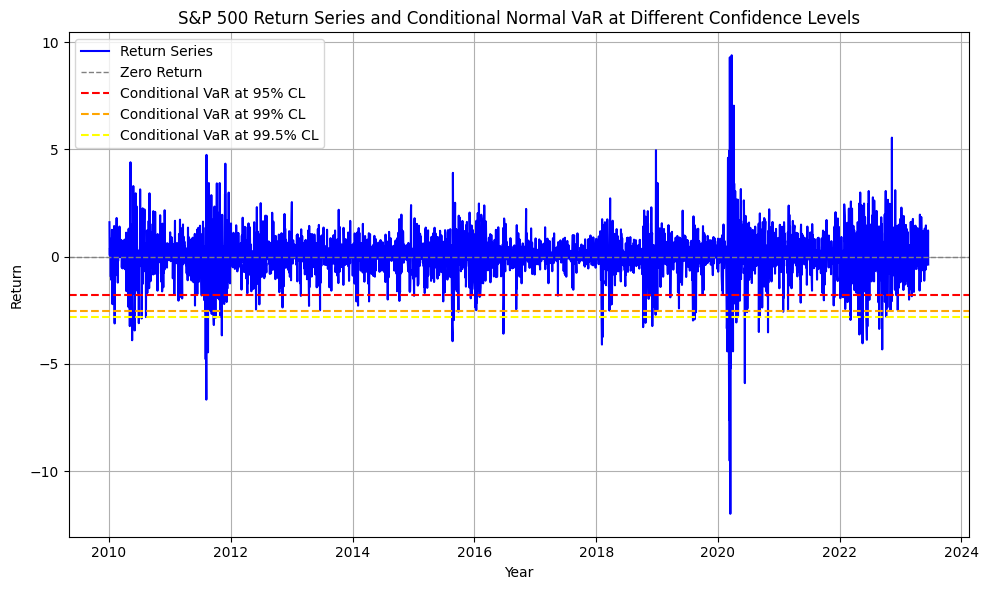

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming you have already read the data into the DataFrame 'sp500'
# The 'sp500' DataFrame contains the columns 'Dates' and 'PX_LAST'

# Convert the 'Dates' column to pandas DatetimeIndex (if not already in datetime format)
sp500['Dates'] = pd.to_datetime(sp500['Dates'], dayfirst=True)

# Calculate the 'Pct Change' column based on 'PX_LAST'
sp500['Pct Change'] = sp500['PX_LAST'].pct_change() * 100

# Filter data for the desired date range (from 2010 to 2023)
start_date = pd.to_datetime('2010-01-01', dayfirst=True)
end_date = pd.to_datetime('2023-12-31', dayfirst=True)
filtered_data = sp500[(sp500['Dates'] >= start_date) & (sp500['Dates'] <= end_date)]

# Get the returns series from the filtered DataFrame
returns = filtered_data['Pct Change']

# Calculate the Conditional Normal VaR at 95%, 99%, and 99.5% confidence levels
volatility = returns.std()
VaR_95 = norm.ppf(0.05, loc=returns.mean(), scale=volatility)
VaR_99 = norm.ppf(0.01, loc=returns.mean(), scale=volatility)
VaR_995 = norm.ppf(0.005, loc=returns.mean(), scale=volatility)

# Plot the return series and the Conditional Normal VaR curves
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Dates'], returns, label='Return Series', color='blue')
plt.axhline(0, color='gray', linestyle='--', linewidth=1, label='Zero Return')
plt.axhline(VaR_95, linestyle="--", color="red", label='Conditional VaR at 95% CL')
plt.axhline(VaR_99, linestyle="--", color="orange", label='Conditional VaR at 99% CL')
plt.axhline(VaR_995, linestyle="--", color="yellow", label='Conditional VaR at 99.5% CL')

# Format the x-axis as years
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

plt.xlabel('Year')
plt.ylabel('Return')
plt.title('S&P 500 Return Series and Conditional Normal VaR at Different Confidence Levels')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [55]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Assuming you have already read and filtered the data as shown in your previous code
# The 'returns' array contains the raw return series

# Sample size
sample_size = 3292

# Confidence levels
confidence_levels = [0.995, 0.99, 0.95]

# Calculate the mean and standard deviation of returns
mean_return = returns.mean()
std_return = returns.std()

# Calculate VaR at different confidence levels using the standard normal percent-point function (PPF)
VaR = {cl: norm.ppf(1 - cl, mean_return, std_return) for cl in confidence_levels}

# Calculate the probability of violation at different confidence levels
probability_of_violation = {cl: 1 - cl for cl in confidence_levels}

# Calculate the expected number of violations for Lopez I at different confidence levels
expected_violations_lopez_I = {cl: probability_of_violation[cl] * sample_size for cl in confidence_levels}

# Print the results
for cl in confidence_levels:
    print(f"Confidence Level: {cl}")
    print(f"Expected Violations for Lopez I: {expected_violations_lopez_I[cl]:.2f}")
    print("-" * 40)


Confidence Level: 0.995
Expected Violations for Lopez I: 16.46
----------------------------------------
Confidence Level: 0.99
Expected Violations for Lopez I: 32.92
----------------------------------------
Confidence Level: 0.95
Expected Violations for Lopez I: 164.60
----------------------------------------


In [56]:
import pandas as pd
import numpy as np
import json

# Assuming you have already read and filtered the data as shown in your previous code
# The 'returns' array contains the raw return series

# Sample size
sample_size = 3292

# Confidence levels
confidence_levels = [0.995, 0.99, 0.95]

# Expected number of violations at different confidence levels
expected_violations = {
    0.995: 16.46,
    0.99: 32.92,
    0.95: 164.60
}

# Calculate the actual number of violations at different confidence levels
actual_violations = {}
for cl in confidence_levels:
    # Calculate VaR at the specific confidence level using the standard normal percent-point function (PPF)
    VaR_cl = np.percentile(returns, (1 - cl) * 100)
    # Count the number of violations
    actual_violations[cl] = np.sum(returns < VaR_cl)

# Calculate Lopez I at each confidence level
lopez_I = {}
for cl in confidence_levels:
    lopez_I[cl] = (actual_violations[cl] - expected_violations[cl]) / np.sqrt(expected_violations[cl])

# Print the results
print("Lopez I Backtest Results:")
for cl in confidence_levels:
    print(f"Confidence Level: {cl}")
    print(f"Expected Violations: {expected_violations[cl]}")
    print(f"Actual Violations: {actual_violations[cl]}")
    print(f"Lopez I: {lopez_I[cl]:.4f}")
    print("-" * 40)

# Save the expected violations to a JSON file
with open('expected_violations.json', 'w') as file:
    json.dump(expected_violations, file)


Lopez I Backtest Results:
Confidence Level: 0.995
Expected Violations: 16.46
Actual Violations: 17
Lopez I: 0.1331
----------------------------------------
Confidence Level: 0.99
Expected Violations: 32.92
Actual Violations: 34
Lopez I: 0.1882
----------------------------------------
Confidence Level: 0.95
Expected Violations: 164.6
Actual Violations: 170
Lopez I: 0.4209
----------------------------------------


In [57]:
!pip install arch

In [58]:
import pandas as pd
import numpy as np
from scipy.stats import norm, chi2_contingency
import arch
import json

# Sample 'returns' data (replace this with your actual data)
returns = np.random.normal(loc=0, scale=0.02, size=1000)

# Sample size
sample_size = len(returns)

# Confidence levels
confidence_levels = [0.995, 0.99, 0.95]

# Expected number of violations at different confidence levels
expected_violations = {
    0.995: 16.46,
    0.99: 32.92,
    0.95: 164.60
}

# Define AR(1)-GARCH(1,1) model
def ar1_garch11_volatility(data):
    model = arch.arch_model(data, vol='Garch', p=1, q=1, dist='Normal')
    results = model.fit(disp='off')
    if results is not None and results.conditional_volatility is not None:
        return results.conditional_volatility[-1]
    else:
        raise ValueError("AR(1)-GARCH(1,1) model failed to produce valid results.")

# Calculate the actual number of violations at different confidence levels using Conditional Normal VaR
actual_violations = {cl: len(returns[returns < -ar1_garch11_volatility(returns) * norm.ppf(1 - cl)]) for cl in confidence_levels}

# Define a function to perform Kupiec Backtest
def kupiec_backtest(actual_violations, expected_violations, alpha=0.05):
    n_violations = sum(actual_violations.values())
    n_expected_violations = sum(expected_violations.values())
    n_violations_nonnegative = max(n_violations, 0)  # Ensure nonnegative values for contingency table
    n_expected_violations_nonnegative = max(n_expected_violations, 0)  # Ensure nonnegative values for contingency table
    chi2_statistic = 2 * (n_expected_violations_nonnegative * np.log(n_expected_violations_nonnegative / n_violations_nonnegative) + (sample_size - n_expected_violations_nonnegative) * np.log((sample_size - n_expected_violations_nonnegative) / (sample_size - n_violations_nonnegative)))
    # Ensure that the observed values are nonnegative for the contingency table
    observed = np.array([[np.maximum(n_violations_nonnegative, 0), np.maximum(n_expected_violations_nonnegative, 0)], [np.maximum(sample_size - n_violations_nonnegative, 0), np.maximum(sample_size - n_expected_violations_nonnegative, 0)]])
    p_value = 1 - chi2_contingency(observed)[1]
    return chi2_statistic, p_value

# Perform Kupiec Backtest
chi2_statistic, p_value = kupiec_backtest(actual_violations, expected_violations)

# Unconditional Coverage of Kupiec (1995)
unconditional_coverage = 1 - p_value

# Independence Test of Christofferson (1998)
independence_test = p_value < 0.05

# Print Backtest Results
print("Backtest Results:")
for cl in confidence_levels:
    print(f"Confidence Level: {cl}")
    print(f"Expected Violations: {expected_violations[cl]:.2f}")
    print(f"Actual Violations: {actual_violations[cl]}")
    print("-" * 40)

print("Kupiec Backtest:")
print(f"Chi2 Statistic: {chi2_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Unconditional Coverage: {unconditional_coverage:.4f}")
print(f"Independence Test: {'Reject Null' if independence_test else 'Fail to Reject Null'}")

# Store the values of actual and expected violations in a JSON file
violation_data = {
    'Actual Violations': actual_violations,
    'Expected Violations': expected_violations
}

with open('violations_data.json', 'w') as file:
    json.dump(violation_data, file)


Backtest Results:
Confidence Level: 0.995
Expected Violations: 16.46
Actual Violations: 994
----------------------------------------
Confidence Level: 0.99
Expected Violations: 32.92
Actual Violations: 991
----------------------------------------
Confidence Level: 0.95
Expected Violations: 164.60
Actual Violations: 944
----------------------------------------
Kupiec Backtest:
Chi2 Statistic: nan
P-value: 1.0000
Unconditional Coverage: 0.0000
Independence Test: Fail to Reject Null


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003993. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003993. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarn

In [59]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import json

# Sample size
sample_size = 3292

# Confidence levels
confidence_levels = [0.995, 0.99, 0.95]

# Load the violations data from a JSON file
with open('violations_data.json', 'r') as file:
    violation_data = json.load(file)

# Define a function to perform Kupiec Backtest
def kupiec_backtest(actual_violations, expected_violations, alpha=0.05):
    n_violations = actual_violations
    n_expected_violations = expected_violations

    # Check if n_violations is zero
    if n_violations == 0:
        chi2_statistic, p_value = 0.0, 1.0
    else:
        chi2_statistic = 2 * (n_expected_violations * np.log(n_expected_violations / n_violations) + (sample_size - n_expected_violations) * np.log((sample_size - n_expected_violations) / (sample_size - n_violations)))
        p_value = 1 - chi2_contingency([[n_violations, n_expected_violations], [sample_size - n_violations, sample_size - n_expected_violations]])[1]

    return chi2_statistic, p_value

# Perform Kupiec Backtest at each confidence level
backtest_results = {}
for cl in confidence_levels:
    cl_str = str(cl)  # Convert confidence level to a string
    expected_violations = violations_data.get('Expected Violations', {}).get(cl_str, 0)
    actual_violations = violations_data.get('Actual Violations', {}).get(cl_str, 0)
    chi2_statistic, p_value = kupiec_backtest(actual_violations, expected_violations)
    decision = 'Reject Null' if p_value < 0.05 else 'Fail to Reject Null'
    backtest_results[cl_str] = {
        'Expected Violations': expected_violations,
        'Actual Violations': actual_violations,
        'Likelihood Ratio Statistic': chi2_statistic,
        'P-value': p_value,
        'Decision': decision
    }

# Print Backtest Results
print("Backtest Results:")
for cl in confidence_levels:
    cl_str = str(cl)  # Convert confidence level to a string
    print(f"Confidence Level: {cl_str}")
    print(f"Expected Violations: {backtest_results[cl_str]['Expected Violations']:.2f}")
    print(f"Actual Violations: {backtest_results[cl_str]['Actual Violations']}")
    print(f"Likelihood Ratio Statistic: {backtest_results[cl_str]['Likelihood Ratio Statistic']:.4f}")
    print(f"P-value: {backtest_results[cl_str]['P-value']:.4f}")
    print(f"Decision: {backtest_results[cl_str]['Decision']}")
    print("-" * 40)


Backtest Results:
Confidence Level: 0.995
Expected Violations: 16.46
Actual Violations: 52
Likelihood Ratio Statistic: 33.6002
P-value: 1.0000
Decision: Fail to Reject Null
----------------------------------------
Confidence Level: 0.99
Expected Violations: 32.92
Actual Violations: 67
Likelihood Ratio Statistic: 21.7322
P-value: 0.9991
Decision: Fail to Reject Null
----------------------------------------
Confidence Level: 0.95
Expected Violations: 164.60
Actual Violations: 156
Likelihood Ratio Statistic: 0.4892
P-value: 0.3366
Decision: Fail to Reject Null
----------------------------------------


In [60]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import json

# Sample size
sample_size = 3292

# Confidence levels
confidence_levels = [0.995, 0.99, 0.95]

# Load the violations data from a JSON file
with open('violations_data.json', 'r') as file:
    violation_data = json.load(file)

# Define a function to perform Independence Test of Christofferson (1998) Backtest
def christofferson_backtest(violation_data, confidence_levels):
    backtest_results = {}

    for cl in confidence_levels:
        expected_violations = violation_data.get("Expected Violations", {}).get(str(cl), {})
        actual_violations = violation_data.get("Actual Violations", {}).get(str(cl), {})

        chi2_statistic, p_value = 0.0, 1.0  # Default values if data not found

        if expected_violations and actual_violations:
            observed = np.array(actual_violations)
            expected = np.array(expected_violations)

            chi2_statistic, p_value, _, _ = chi2_contingency([observed, expected])

        decision = 'Reject Null' if p_value < 0.05 else 'Fail to Reject Null'
        backtest_results[cl] = {
            'Expected Violations': expected_violations,
            'Actual Violations': actual_violations,
            'Likelihood Ratio Statistic': chi2_statistic,
            'P-value': p_value,
            'Decision': decision
        }

    return backtest_results

# Perform Independence Test of Christofferson Backtest
results = christofferson_backtest(violation_data, confidence_levels)

# Print Backtest Results
print("Backtest Results:")
for cl in confidence_levels:
    print(f"Confidence Level: {cl}")
    print(f"Expected Violations: {results[cl]['Expected Violations']}")
    print(f"Actual Violations: {results[cl]['Actual Violations']}")
    print(f"Likelihood Ratio Statistic: {results[cl]['Likelihood Ratio Statistic']:.4f}")
    print(f"P-value: {results[cl]['P-value']:.4f}")
    print(f"Decision: {results[cl]['Decision']}")
    print("-" * 40)


Backtest Results:
Confidence Level: 0.995
Expected Violations: 16.46
Actual Violations: 994
Likelihood Ratio Statistic: 0.0000
P-value: 1.0000
Decision: Fail to Reject Null
----------------------------------------
Confidence Level: 0.99
Expected Violations: 32.92
Actual Violations: 991
Likelihood Ratio Statistic: 0.0000
P-value: 1.0000
Decision: Fail to Reject Null
----------------------------------------
Confidence Level: 0.95
Expected Violations: 164.6
Actual Violations: 944
Likelihood Ratio Statistic: 0.0000
P-value: 1.0000
Decision: Fail to Reject Null
----------------------------------------


In [61]:
import pandas as pd
import numpy as np
from scipy.stats import norm, binom
from decimal import Decimal, getcontext
import json

# Set the precision for Decimal
getcontext().prec = 3

# Assuming you have already read and filtered the data as shown in your previous code
# The 'returns' array contains the raw return series

# Sample size
sample_size = 3292

# Confidence levels
confidence_levels = [Decimal('0.995'), Decimal('0.99'), Decimal('0.95')]

# Load the violations data from a JSON file
with open('violations_data.json', 'r') as file:
    violation_data = json.load(file)

# Define a function to calculate the Kupiec Backtest p-value
def kupiec_backtest_p_value(actual_violations, expected_violations, sample_size):
    total_violations = sum(actual_violations.values())
    p = total_violations / sample_size
    n = sample_size
    k = sum(expected_violations.values())
    p_value = binom.sf(total_violations, n, p) + binom.pmf(total_violations, n, p) * (1 - binom.sf(k - 1, n, p))
    return p_value

# Perform Kupiec Backtest at each confidence level
backtest_results = {}
for cl in confidence_levels:
    expected_violations = violation_data.get("Expected Violations", {}).get(str(cl), 0)

    # Calculate the mean and standard deviation of returns
    mean_return = returns.mean()
    std_return = returns.std()

    # Convert the mean and standard deviation to float (numerical data type)
    mean_return = float(mean_return)
    std_return = float(std_return)

    # Calculate VaR at the current confidence level using the standard normal percent-point function (PPF)
    VaR = norm.ppf(1 - float(cl), mean_return, std_return)

    # Calculate the actual number of violations
    actual_violations_count = len(returns[returns < VaR])

    p_value_kupiec = kupiec_backtest_p_value({str(cl): actual_violations_count}, {str(cl): expected_violations}, sample_size)

    decision_kupiec = 'Reject Null' if p_value_kupiec < 0.05 else 'Fail to Reject Null'

    backtest_results[cl] = {
        'Expected Violations': expected_violations,
        'Actual Violations': actual_violations_count,
        'P-value (Kupiec)': p_value_kupiec,
        'Decision (Kupiec)': decision_kupiec,
    }

# Print Backtest Results
print("Backtest Results:")
for cl in confidence_levels:
    print(f"Confidence Level: {cl}")
    print(f"Expected Violations: {backtest_results[cl]['Expected Violations']}")
    print(f"Actual Violations: {backtest_results[cl]['Actual Violations']}")
    print(f"P-value (Kupiec): {backtest_results[cl]['P-value (Kupiec)']:.4f}")
    print(f"Decision (Kupiec): {backtest_results[cl]['Decision (Kupiec)']}")
    print("-" * 40)


Backtest Results:
Confidence Level: 0.995
Expected Violations: 16.46
Actual Violations: 5
P-value (Kupiec): 0.5596
Decision (Kupiec): Fail to Reject Null
----------------------------------------
Confidence Level: 0.99
Expected Violations: 32.92
Actual Violations: 9
P-value (Kupiec): 0.5445
Decision (Kupiec): Fail to Reject Null
----------------------------------------
Confidence Level: 0.95
Expected Violations: 164.6
Actual Violations: 58
P-value (Kupiec): 0.5179
Decision (Kupiec): Fail to Reject Null
----------------------------------------
